In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import yfinance as yf

data = yf.download("ADANIENT.NS")
print(data)

[*********************100%***********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2002-07-01     1.364148     1.401700     1.334259     1.362615    -0.010443   
2002-07-02     1.386372     1.390971     1.356484     1.373344    -0.010525   
2002-07-03     1.371811     1.387139     1.364914     1.373344    -0.010525   
2002-07-04     1.379475     1.401700     1.379475     1.381008    -0.010584   
2002-07-05     1.388672     1.388672     1.372578     1.377942    -0.010560   
...                 ...          ...          ...          ...          ...   
2024-10-07  3110.649902  3128.500000  2980.449951  3018.000000  3018.000000   
2024-10-08  3018.500000  3170.000000  2994.850098  3160.699951  3160.699951   
2024-10-09  3175.000000  3179.949951  3134.399902  3153.750000  3153.750000   
2024-10-10  3140.000000  3211.000000  3056.100098  3174.199951  3174.199951   
2024-10-11  3174.199951  3190.000000  3116.000000  3

In [ ]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,1.364148,1.401700,1.334259,1.362615,-0.010443,1080397
2002-07-02,1.386372,1.390971,1.356484,1.373344,-0.010525,1016147
2002-07-03,1.371811,1.387139,1.364914,1.373344,-0.010525,980394
2002-07-04,1.379475,1.401700,1.379475,1.381008,-0.010584,972747
2002-07-05,1.388672,1.388672,1.372578,1.377942,-0.010560,974496
2002-07-08,1.394803,1.454580,1.364914,1.438486,-0.011024,1061686
2002-07-09,1.433121,1.440785,1.391737,1.400934,-0.010737,1024719
2002-07-10,1.410130,1.410130,1.387139,1.399401,-0.010725,946638
2002-07-11,1.449215,1.449215,1.372578,1.376410,-0.010549,968220


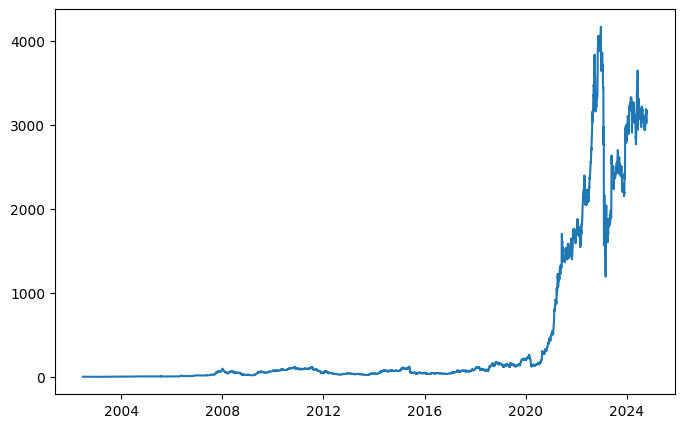

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(data['Close'], label='Close Price history')

In [ ]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [ ]:
x = data[['Open - Close', 'High - Low']]
x.head()

,Open - Close,High - Low
Date,,
2002-07-01,0.001533,0.067441
2002-07-02,0.013028,0.034487
2002-07-03,-0.001533,0.022225
2002-07-04,-0.001533,0.022225
2002-07-05,0.010730,0.016094


In [ ]:
Yout = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)

In [ ]:
Yout

array([ 1, -1,  1, ...,  1, -1, -1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Yout, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

model.fit(x_train, y_train)

accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_test = accuracy_score(y_test, model.predict(x_test))

print('Accuracy train: {}'.format(accuracy_train))
print('Accuracy test: {}'.format(accuracy_test))


Accuracy train: 0.6180257510729614
Accuracy test: 0.4896115627822945


In [ ]:
print('Best score: {}'.format(model.best_score_))
print('Best parameters: {}'.format(model.best_params_))

Best score: 0.5287964698830521
Best parameters: {'n_neighbors': 16}


In [ ]:
prediction_classification = model.predict(x_test)

In [ ]:
actual_predicted_data = pd.DataFrame({'Actual': y_test, 'Predicted': prediction_classification})
actual_predicted_data

,Actual,Predicted
0,1,-1
1,-1,-1
2,1,-1
3,-1,-1
4,1,1
...,...,...
1102,1,-1
1103,1,-1
1104,1,-1
1105,1,-1


In [ ]:
actual_predicted_data.head(10)

,Actual,Predicted
0,1,-1
1,-1,-1
2,1,-1
3,-1,-1
4,1,1
5,1,1
6,-1,1
7,1,1
8,-1,-1
9,-1,-1


In [ ]:
y = data['Close']
y

,Close
Date,
2002-07-01,1.362615
2002-07-02,1.373344
2002-07-03,1.373344
2002-07-04,1.381008
2002-07-05,1.377942
...,...
2024-10-07,3018.000000
2024-10-08,3160.699951
2024-10-09,3153.750000


**Implemenation of KNN Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import neighbors

In [ ]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(x, y, test_size=0.2, random_state=42)

params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14, 15, 16]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

model_reg.fit(X_train_reg, y_train_reg)
predictions = model_reg.predict(X_test_reg)

In [ ]:
print(predictions)

[ 139.59480333   48.46638727   57.0636611  ...   68.86883199 2340.05626297
   89.58688307]


In [ ]:
rms = np.sqrt(mean_squared_error(y_test_reg, predictions))
print(rms)

334.54493203581677


In [ ]:
valid = pd.DataFrame({'Actual': y_test_reg, 'Predicted': predictions})
valid

,Actual,Predicted
Date,,
2014-04-16,65.984909,139.594803
2008-06-06,56.052689,48.466387
2008-08-08,49.768410,57.063661
2003-05-19,1.412429,3.449598
2013-09-10,21.435516,28.594510
...,...,...
2016-12-20,39.369114,41.408886
2002-10-07,1.049167,1.172362
2014-07-16,68.973778,68.868832


In [25]:
accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_test = accuracy_score(y_test, model.predict(x_test))
print('Accuracy train: {}'.format(accuracy_train))
print('Accuracy test: {}'.format(accuracy_test))


Accuracy train: 0.6180257510729614
Accuracy test: 0.4896115627822945


In [26]:
from sklearn.metrics import classification_report

# For training data
print('Classification Report (Training):\n', classification_report(y_train, model.predict(x_train)))

# For testing data
print('Classification Report (Testing):\n', classification_report(y_test, model.predict(x_test)))


Classification Report (Training):
               precision    recall  f1-score   support

          -1       0.60      0.72      0.65      2201
           1       0.65      0.52      0.58      2226

    accuracy                           0.62      4427
   macro avg       0.62      0.62      0.61      4427
weighted avg       0.62      0.62      0.61      4427

Classification Report (Testing):
               precision    recall  f1-score   support

          -1       0.48      0.57      0.52       542
           1       0.50      0.41      0.45       565

    accuracy                           0.49      1107
   macro avg       0.49      0.49      0.49      1107
weighted avg       0.49      0.49      0.49      1107



In [27]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train_reg, model_reg.predict(X_train_reg))
r2_test = r2_score(y_test_reg, model_reg.predict(X_test_reg))

print('R² score train: {}'.format(r2_train))
print('R² score test: {}'.format(r2_test))


R² score train: 0.8877795735210631
R² score test: 0.8690434989971187


In [28]:
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train_reg, model_reg.predict(X_train_reg))
mae_test = mean_absolute_error(y_test_reg, model_reg.predict(X_test_reg))

print('MAE train: {}'.format(mae_train))
print('MAE test: {}'.format(mae_test))


MAE train: 120.5835479284103
MAE test: 132.02399737417173
